# timing_match

In [1]:
%matplotlib inline
import pandas as pd # nice data utilities
import os
import numpy as np
import matplotlib.pyplot as plt # getting specific plotting functions

Read in the csv file

In [2]:
fname = './data/DHO_cwv.csv' #this file is created by running gpx_to_csv.ipynb
gps_track = pd.read_table(fname, 
                          header = 0,
                          sep    = ',',
                          names  = ['time','lat','lon','ele','x:speed']
                         );

Read in the radio logging file

In [3]:
radio_log = pd.read_table('./data/log_1.csv',
                          header = 0,
                          sep    = ',',
                          names  = ['t','tm','s']
                         );

Let's get some intuition on what the time data looks like. For each GPS track point we have a bunch of radio data points.

800 6850
1456683737 1456683630.24


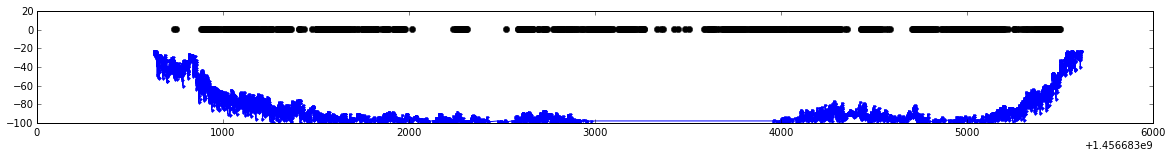

In [4]:
print(len(gps_track.time),len(radio_log.t))  #the time arrays have different lengths
print(gps_track.time[0],radio_log.t[0])
fig = plt.figure(figsize=(20,2))
plt.plot(radio_log.t, radio_log.s,'b.-')
plt.plot(gps_track.time, np.ones_like(gps_track.time),'ko')

Let's scan through the radio data pts and group average data for times less than the GPS track point event. Although indexing array elements in a loop is typically frowned upon in SciPy land, we think that this type of task is more clearly expressed in a loop than using array processing functions directly.

800


<Container object of 3 artists>

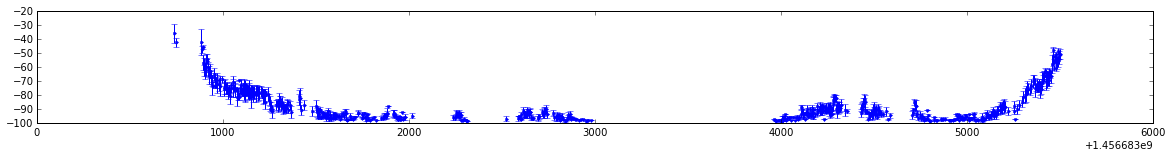

In [5]:
avg_sRs = []    #this will hold the RSSI signal average over the interval
std_sRs = []    #this will hold the RSSI signal standard deviation over the interval
group_sRs = []  #used to temporarily group data in an interval
iR = 0          #index into radio data array
#each GPS time will be the righthand bound of the interval
for tG in gps_track.time:
    tR = radio_log.t[iR]
    while tR < tG :
        iR += 1  #move the interval to the right
        tR = radio_log.t[iR]
        group_sRs.append(radio_log.s[iR])
    #finish calculating this interval
    if len(group_sRs) == 0: #empty interval means radio dropout
        avg_sRs.append(np.NaN)
        std_sRs.append(0)
    else:
        avg_sRs.append(np.mean(group_sRs))
        std_sRs.append(np.std(group_sRs))
    #begin new interval
    group_sRs = []

avg_sRs = np.array(avg_sRs)
std_sRs = np.array(std_sRs)
print(len(avg_sRs))
fig = plt.figure(figsize=(20,2))
plt.errorbar(gps_track.time, avg_sRs, yerr = std_sRs, fmt = '.')

Save the data by extending the pandas dataframe

In [6]:
gps_track['RSSI'] = avg_sRs
gps_track['RSSI_err'] = std_sRs
#generate new filename
base, ext = os.path.splitext(fname)
new_fname = "%s_GPS-RSSI.csv"
gps_track.to_csv(new_fname)

In [88]:
gps_track

,time,lat,lon,ele,x:speed,RSSI,RSSI_err
0,1456683737,43.157290,-70.976800,54.4,0.50,-35.904459,6.913278
1,1456683746,43.157356,-70.976880,65.1,0.00,-42.357143,3.198373
2,1456683883,43.157337,-70.976690,66.4,0.00,-41.952038,9.484436
3,1456683887,43.157314,-70.976810,63.9,1.00,-47.416667,2.361438
4,1456683891,43.157340,-70.976790,64.0,1.25,-45.615385,1.273303
5,1456683894,43.157340,-70.976746,62.6,0.50,-56.777778,5.533289
6,1456683898,43.157352,-70.976700,62.3,1.00,-60.000000,6.275716
7,1456683901,43.157383,-70.976670,62.4,1.25,-61.222222,2.657391
8,1456683904,43.157410,-70.976640,62.0,1.00,-62.333333,5.981453
9,1456683907,43.157433,-70.976590,63.4,1.25,-60.200000,5.979967
